# Решить задачу предсказания необходимости найма сотрудников.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix

https://www.kaggle.com/datasets/helddata/turnover-team-data

1 Team identifier (unique team number).

2 Team size (number of people in the team).

3 Team turnover 2014 (separation rate between 0 and 1).

4 Country (1 = UK; 2 = United States; 3 = CANADA; 4 = SPAIN).

5 SURVEY: ENGAGEMENT items COMBO (composite engagement percentage across the team).

6 SURVEY: TeamLeader Rating (composite team leader percentage across the team).

7 SURVEY: CSR rating (composite corporate social responsibility percentage across the team).

8 SURVEY: Drive for Performance (composite percentage team score on perceived ‘Drive for performance’ percentage).

9 SURVEY: Performance, Development and Reward (composite percentage team score on perceived fairness of performance, development and reward across the team).

10 SURVEY: Work–Life Balance (composite percentage team score on perceived work–life balance across the team).

11 UK dummy variable (0 = not UK; 1 = UK).

12 USA dummy variable (0 = not United States; 1 = United States).

13 Canada dummy variable (0 = not Canada; 1 = Canada).

14 Spain dummy variable (0 = not Spain; 1 = Spain).

In [2]:
df = pd.read_csv('data/Chapter_6_Turnover_team_DATA.csv')
df = df.drop('TeamNumber', axis=1)
df

,TeamSize,TeamSeparation,Country,Engagement,TeamLeader,SociallyResponsible,DriveForPerformance,PerfDevReward,WLB,UKdummy,USAdummy,CanadaDummy,SpainDummy
0,12,0.0,1,79,45,85,65,65,75,1,0,0,0
1,11,0.0,1,99,58,89,56,64,61,1,0,0,0
2,12,0.0,1,76,65,90,86,79,67,1,0,0,0
3,16,0.0,1,80,69,89,92,71,83,1,0,0,0
4,17,0.0,1,88,42,76,67,57,47,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,13,0.7,4,35,45,77,81,75,85,0,0,0,1
208,16,0.7,4,76,46,75,100,66,75,0,0,0,1
209,14,0.7,4,70,18,56,75,57,62,0,0,0,1
210,14,0.7,4,55,51,84,100,69,50,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TeamSize             212 non-null    int64  
 1   TeamSeparation       212 non-null    float64
 2   Country              212 non-null    int64  
 3   Engagement           212 non-null    int64  
 4   TeamLeader           212 non-null    int64  
 5   SociallyResponsible  212 non-null    int64  
 6   DriveForPerformance  212 non-null    int64  
 7   PerfDevReward        212 non-null    int64  
 8   WLB                  212 non-null    int64  
 9   UKdummy              212 non-null    int64  
 10  USAdummy             212 non-null    int64  
 11  CanadaDummy          212 non-null    int64  
 12  SpainDummy           212 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 21.7 KB


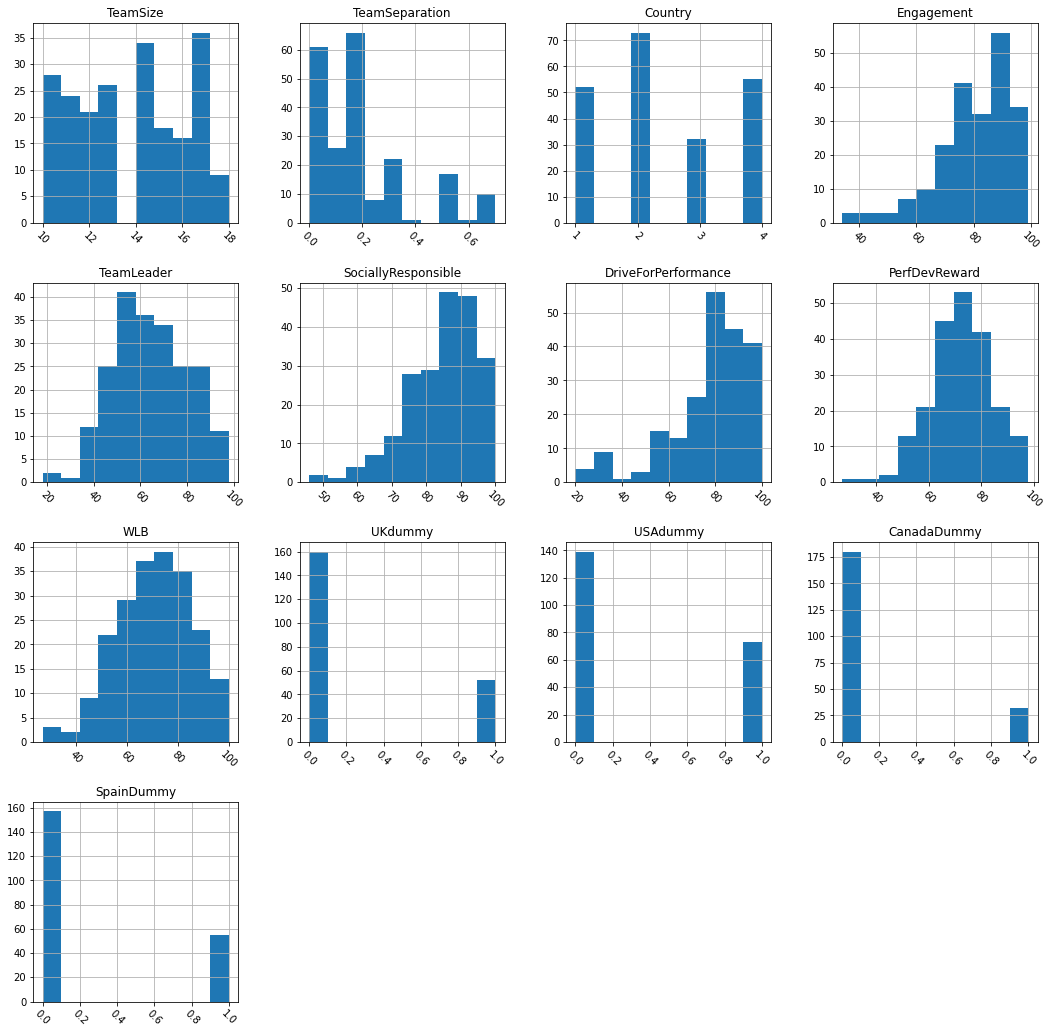

In [4]:
df.hist(figsize=(18, 18), xrot=-45);

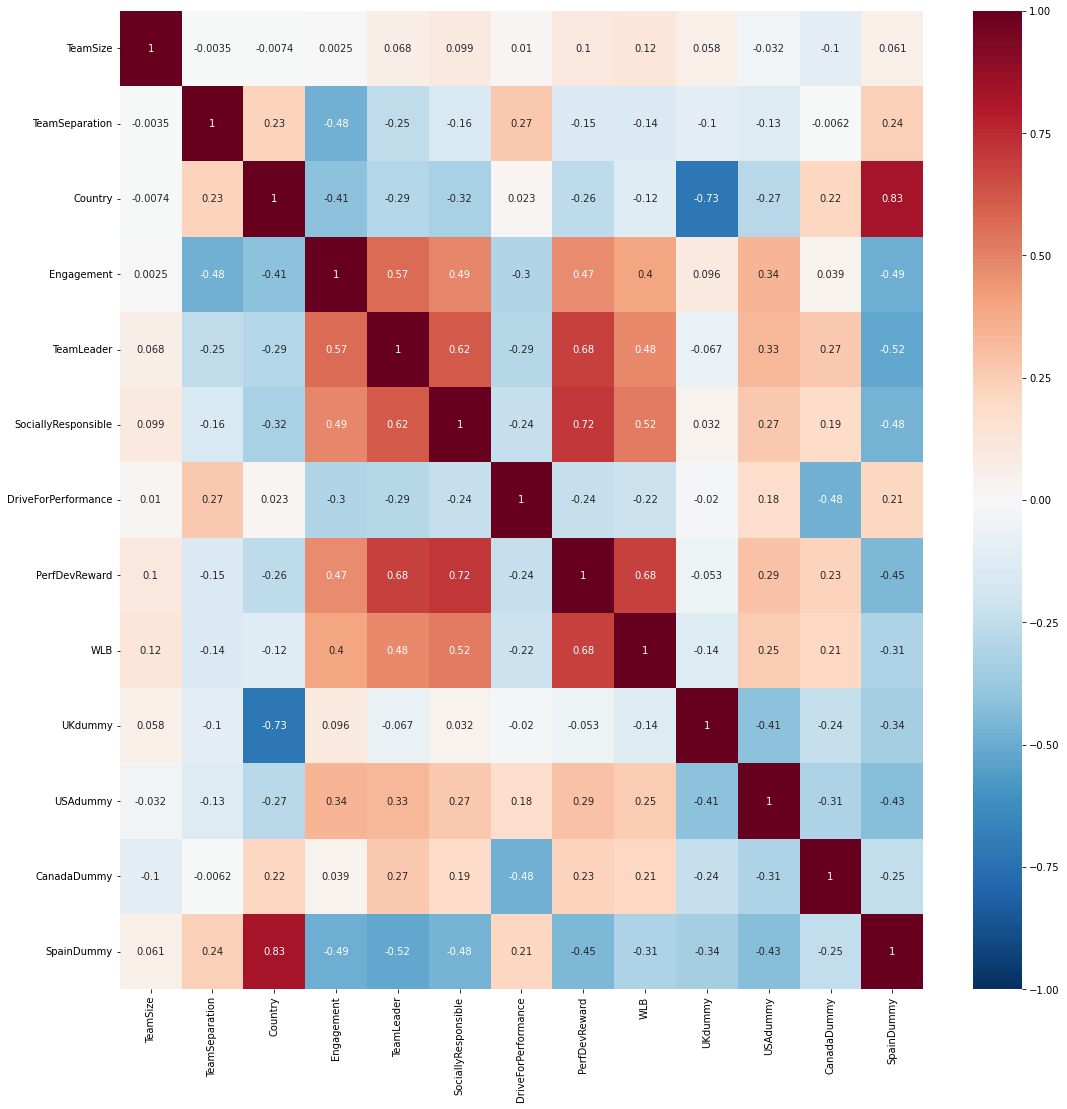

In [5]:
plt.figure(figsize=(18, 18))
sb.heatmap(df.corr(),
 annot=True,
 cmap='RdBu_r',
 vmin=-1,
 vmax=1);

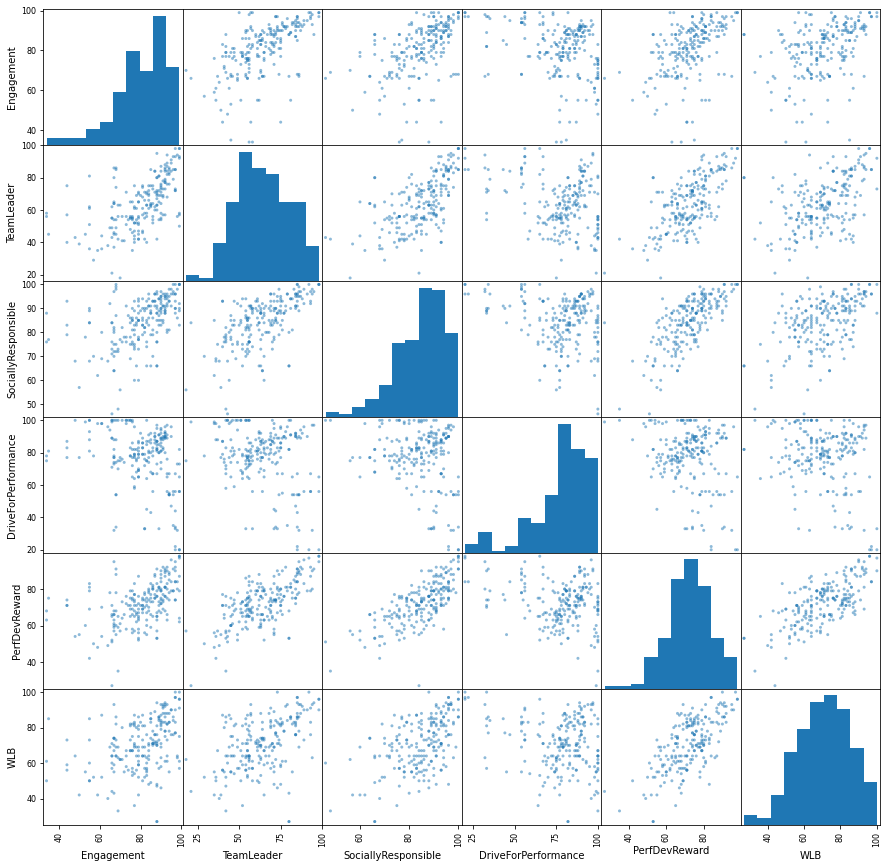

In [6]:
scatter_matrix(df[["Engagement", "TeamLeader", "SociallyResponsible", "DriveForPerformance", "PerfDevReward", "WLB"]], alpha=0.5, figsize=(15, 15));

In [7]:
target = 'TeamSeparation'
X = df.drop(target, axis=1)
y = df[target]

In [8]:
ss = StandardScaler()

In [9]:
X_n = ss.fit_transform(X)
X_n

array([[-0.69500409, -1.27223603, -0.11099996, ..., -0.72469294,
        -0.42163702, -0.59187707],
       [-1.09757476, -1.27223603,  1.40231139, ..., -0.72469294,
        -0.42163702, -0.59187707],
       [-0.69500409, -1.27223603, -0.33799666, ..., -0.72469294,
        -0.42163702, -0.59187707],
       ...,
       [ 0.11013726,  1.40704249, -0.79199007, ..., -0.72469294,
        -0.42163702,  1.68954001],
       [ 0.11013726,  1.40704249, -1.92697358, ..., -0.72469294,
        -0.42163702,  1.68954001],
       [ 1.31784928,  1.40704249, -3.5159505 , ..., -0.72469294,
        -0.42163702,  1.68954001]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, train_size=0.8, random_state=42)

In [11]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.2755167279956101

In [12]:
y_pred = reg.predict(X_test)
mean_absolute_error_linear_model = mean_absolute_error(y_test, y_pred)
mean_squared_error_linear_model = mean_squared_error(y_test, y_pred)

In [13]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))

MAE:    0.13, RMSE:    0.17 для модели линейной регрессии


In [14]:
rfr = RandomForestRegressor().fit(X_train, y_train)
rfr.score(X_train, y_train)

0.8863251851028473

In [15]:
y_pred = rfr.predict(X_test)
mean_absolute_error_random_forest_model = mean_absolute_error(y_test, y_pred)
mean_squared_error_random_forest_model = mean_squared_error(y_test, y_pred)

In [16]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model,
       np.sqrt(mean_squared_error_random_forest_model)))

MAE:    0.12, RMSE:    0.16 для модели случайного леса


In [17]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])

In [18]:
feature_importance['Название признака'] = X.keys()
feature_importance['Важность признака'] = rfr.feature_importances_

In [19]:
# выведем полученную таблицу
feature_importance

,Название признака,Важность признака
0,TeamSize,0.051607
1,Country,0.014305
2,Engagement,0.344033
3,TeamLeader,0.080239
4,SociallyResponsible,0.137665
5,DriveForPerformance,0.178476
6,PerfDevReward,0.076355
7,WLB,0.084720
8,UKdummy,0.014385
9,USAdummy,0.005235


In [20]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
2,Engagement,0.344033
5,DriveForPerformance,0.178476
4,SociallyResponsible,0.137665
7,WLB,0.084720
3,TeamLeader,0.080239
6,PerfDevReward,0.076355
0,TeamSize,0.051607
8,UKdummy,0.014385
1,Country,0.014305
10,CanadaDummy,0.007981
